# Tensores

Un tensor es como un array de Numpy, pero con soporte para GPU y gradientes.+
Los tensores son la unidad mínima de datos en deep learning.
Todo modelo se reduce a operaciones tensoriales (suma, multiplicación, activación).
Forward pass = aplicar una serie de transformaciones determinísticas sobre tensores.

requires_grad=True activa el seguimiento para el backprop posterior.

In [4]:
#SETUP
import torch

#Seed para reproducibilidad, los pesos y biases son aleatorios
#pero queremos que sean los mismos en cada run
torch.manual_seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Usando:", device)
torch.cuda.get_device_name(0)
print(torch.cuda.memory_summary(device=None, abbreviated=True))



Usando: cuda
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |
|---------------------------------------------------------------------------|
| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |
|---------------------------------------------------------------------------|
| Requested memory      |      0 B   |      0 B   |      0 B   |      0 B   |
|--------------------------------------------------

In [ ]:
# Declaramos tensores de entrada, pesos y bias en GPU.
# Esto representa el núcleo matemático de una sola neurona (perceptrón lineal).

# x tiene forma (3, 2):
#   - 3 filas → 3 casas (3 muestras)
#   - 2 columnas → 2 características por casa (tamaño, nº de habitaciones)
# Estos datos vendrian de un dataset de casas.
x = torch.tensor([
    [90.0, 3.0],   # Casa 1
    [120.0, 4.0],  # Casa 2
    [60.0, 2.0]    # Casa 3
], device="cuda")

# w tiene forma (2, 1):
#   - 2 filas → un peso por cada característica de entrada
#   - 1 columna → una neurona (una salida)
# Supongamos que el tamaño influye más que el número de habitaciones.
# Estos pesos serian random, pero los fijamos para el ejemplo.
w = torch.tensor([
    [0.8],  # peso asociado al tamaño
    [0.3]   # peso asociado a las habitaciones
], device="cuda")

# b tiene forma (1,):
#   - un sesgo que ajusta la salida de todas las muestras.
b = torch.tensor([10.0], device="cuda")

# operación lineal: y = x @ w + b
#   - @ es el producto matricial
#   - El bias se suma a cada fila del resultado
y = x @ w + b

print("=== Datos de entrada (x) ===")
print(x)
print("\n=== Pesos (w) ===")
print(w)
print("\n=== Bias (b) ===")
print(b)
print("\n=== Salida (y = x @ w + b) ===")
print(y)

=== Datos de entrada (x) ===
tensor([[ 90.,   3.],
        [120.,   4.],
        [ 60.,   2.]], device='cuda:0')

=== Pesos (w) ===
tensor([[0.8000],
        [0.3000]], device='cuda:0')

=== Bias (b) ===
tensor([10.], device='cuda:0')

=== Salida (y = x @ w + b) ===
tensor([[ 82.9000],
        [107.2000],
        [ 58.6000]], device='cuda:0')



### Tensores aplicados a imagenes.
Esto esta relacionado con el notebok 2-CNN-Color
Nos ayudará a entender que hace.
En especifico con la linea:

 x.sum(dim=(0,2,3))

In [ ]:
import torch
# Creamos un tensor de 4D 2 imagenes, 3 canales, 2 filas y 2 columnas
# [batch=2, canales=3, alto=2, ancho=2]

#los pixeles se representan por la posicion de cada numero
#Un unico canal se compone de 1 matriz 2x2
#Un sample (imagen) son entonces 3 matrices: una por cada canal
#Como la imagen es de 2x2, cada matriz tiene 2 filas y 2 columnas

#Como tenemos 2 imagenes, tenemos 2 samples dentro de un batch
x = torch.tensor([
    [  # Imagen 1 (sample  1) una imagen tiene 3 dimensiones
        [[1, 2],    # Primera fila de pixeles del canal R
         [3, 4]],    # canal R

        [[5, 6],
         [7, 8]],    # canal G

        [[9,10],
         [11,12]]    # canal B
    ],
    [  # Imagen 2 (sample  2)
        [[13,14], 
         [15,16]],   # canal R

        [[17,18],
         [19,20]],   # canal G

        [[21,22],
         [23,24]]    # canal B
    ]
], dtype=torch.float32)

print("shape:", x.shape)   # [2, 3, 2, 2]


shape: torch.Size([2, 3, 2, 2])


Vamos a visualizarlo.

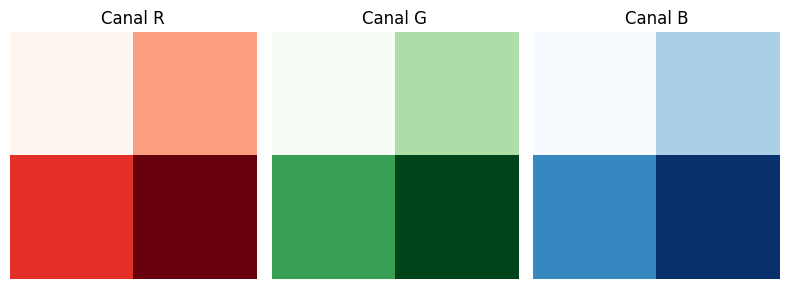

In [2]:
import matplotlib.pyplot as plt

# Seleccionamos la primera imagen del batch
img = x[0]  # shape [3, 2, 2]

# Extraemos los tres canales individuales
r = img[0]  # canal rojo
g = img[1]  # canal verde
b = img[2]  # canal azul

# Mostramos los tres canales por separado
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

axs[0].imshow(r, cmap='Reds')
axs[0].set_title('Canal R')
axs[1].imshow(g, cmap='Greens')
axs[1].set_title('Canal G')
axs[2].imshow(b, cmap='Blues')
axs[2].set_title('Canal B')

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()
